# Bank Customer Satisfaction Prediction using CNN and Feature Selection

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 42kB/s 
     |████████████████████████████████| 3.9MB 33.9MB/s 
     |████████████████████████████████| 450kB 41.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=b4be5d9cda388f961f5087c05383fb0f50d3a17fc0d6dab73cae2f4222c0ab35
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc4 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc4 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc4 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Unins

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv1D,MaxPool1D,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.1.0


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [0]:
# Dataset link https://github.com/laxmimerit/Data-Files-for-Feature-Selection

In [6]:
!git clone "https://github.com/laxmimerit/Data-Files-for-Feature-Selection"

Cloning into 'Data-Files-for-Feature-Selection'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 6), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [7]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data-Files-for-Feature-Selection/santander-train.csv")
data.head

<bound method NDFrame.head of            ID  var3  var15  ...  saldo_medio_var44_ult3          var38  TARGET
0           1     2     23  ...                     0.0   39205.170000       0
1           3     2     34  ...                     0.0   49278.030000       0
2           4     2     23  ...                     0.0   67333.770000       0
3           8     2     37  ...                     0.0   64007.970000       0
4          10     2     39  ...                     0.0  117310.979016       0
...       ...   ...    ...  ...                     ...            ...     ...
76015  151829     2     48  ...                     0.0   60926.490000       0
76016  151830     2     39  ...                     0.0  118634.520000       0
76017  151835     2     23  ...                     0.0   74028.150000       0
76018  151836     2     25  ...                     0.0   84278.160000       0
76019  151838     2     46  ...                     0.0  117310.979016       0

[76020 rows x 371 col

In [8]:
data.shape

(76020, 371)

In [9]:
X = data.drop(labels=['ID','TARGET'],axis =1)
X.shape

(76020, 369)

In [10]:
y = data['TARGET']
y.shape

(76020,)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0 , stratify = y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60816, 369), (15204, 369), (60816,), (15204,))

# Remove Constant, Quasi-constant and Duplicate Features

In [12]:
# In scikit-learn estimator api,

# fit() : used for generating learning model parameters from training data

# transform() : parameters generated from fit() method,applied upon model to generate transformed data set.

# fit_transform() : combination of fit() and transform() api on same data set

filter = VarianceThreshold(0.01)
X_train = filter.fit_transform(X_train)
X_test = filter.transform(X_test)

X_train.shape,X_test.shape

((60816, 273), (15204, 273))

In [13]:
# features removed from the dataset
369 - 273 

96

In [14]:
X_train_T = X_train.T
X_test_T = X_test.T

X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

X_train_T.shape,X_test_T.shape

((273, 60816), (273, 15204))

In [15]:
X_train_T.duplicated().sum()

17

In [16]:
duplicated_features = X_train_T.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
268    False
269    False
270    False
271    False
272    False
Length: 273, dtype: bool

In [17]:
features_to_keep = [not index for index in duplicated_features]
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [18]:
X_train = X_train_T[features_to_keep].T
X_train.shape
X_test = X_test_T[features_to_keep].T
X_train.shape,X_test.shape

((60816, 256), (15204, 256))

In [19]:
# features removed from the dataset
369 - 256 

113

In [20]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,39,41,...,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272
0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,55.74,0.00,60.0,57.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85472.340000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317769.240000
3,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,15.00,4.83,15.0,11.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76209.960000
4,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,90.00,40.68,90.0,73.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302754.000000


In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # not fit_transform to prevent overfitting

In [22]:
X_train.shape,X_test.shape

((60816, 256), (15204, 256))

In [23]:
X_train = X_train.reshape(60816,256,1)
X_test = X_test.reshape(15204,256,1)
X_train.shape,X_test.shape

((60816, 256, 1), (15204, 256, 1))

In [0]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [25]:
model = Sequential()
model.add(Conv1D(filters = 32, kernel_size= 3 , activation="relu" , input_shape = (256,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.30))

model.add(Conv1D(filters = 64, kernel_size= 3 , activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.50))

model.add(Conv1D(filters = 128, kernel_size= 3 , activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.50))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.50))

model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 254, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 127, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 125, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 64)            0

In [0]:
model.compile(optimizer=Adam(lr=0.00005),loss="binary_crossentropy",metrics=["accuracy"])

In [27]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose = 1)

Train on 60816 samples, validate on 15204 samples
Epoch 1/10
60816/60816 [==============================] - 28s 462us/sample - loss: 0.2168 - accuracy: 0.9528 - val_loss: 0.1946 - val_accuracy: 0.9600
Epoch 2/10
60816/60816 [==============================] - 20s 333us/sample - loss: 0.1748 - accuracy: 0.9594 - val_loss: 0.1861 - val_accuracy: 0.9605
Epoch 3/10
60816/60816 [==============================] - 20s 337us/sample - loss: 0.1685 - accuracy: 0.9602 - val_loss: 0.1720 - val_accuracy: 0.9604
Epoch 4/10
60816/60816 [==============================] - 21s 347us/sample - loss: 0.1621 - accuracy: 0.9604 - val_loss: 0.1671 - val_accuracy: 0.9604
Epoch 5/10
60816/60816 [==============================] - 21s 345us/sample - loss: 0.1589 - accuracy: 0.9604 - val_loss: 0.1608 - val_accuracy: 0.9604
Epoch 6/10
60816/60816 [==============================] - 21s 346us/sample - loss: 0.1569 - accuracy: 0.9604 - val_loss: 0.1605 - val_accuracy: 0.9603
Epoch 7/10
60816/60816 [====================

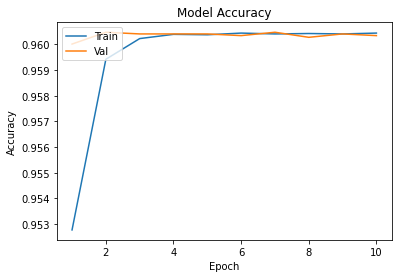

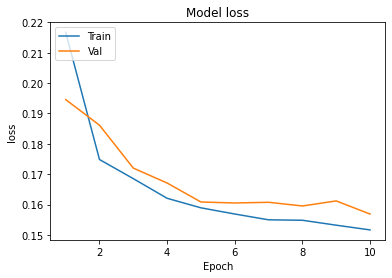

In [28]:

def plot_learningCurve(history,epochs):
  # Plot the training and validation accuracy valeus
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend(["Train","Val"],loc = "upper left")
  plt.show()
  # Plot the training and validation accuracy valeus
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model loss")
  plt.xlabel("Epoch")
  plt.ylabel("loss")
  plt.legend(["Train","Val"],loc = "upper left")
  plt.show()

plot_learningCurve(history,10)